# Visualizing Gradient Decent

## Imports

In [4]:
import numpy as np 
import random as rd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits import mplot3d

%matplotlib notebook


## Testing

In [26]:
def grad_decent(f, grad_f, start_x = None, min_x = -1, max_x = 1, alpha = 0.05, tol = 0.01):
    if start_x == None:
        start_x = rd.uniform(min_x, max_x)
    
    x1 = f(start_x)
    x2 = x1 - alpha * grad_f(x1)
    i  = 1
    while np.linalg.norm(grad_f(x1)) > tol:
        i += 1
        x2 = x1 - alpha * grad_f(x1)
        x1 = x2
        if i>100000000:
            print('The algorithm doesnt converge!')
            return
        
    #print(f'The algorithm converged in {i} steps!')
    #print(f'Gradient of last x is {grad_f(x2)}')
    return x2

f = lambda x: x**2
grad_f = lambda x: 2*x
%timeit grad_decent(f,grad_f)

126 µs ± 1.31 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Works good.

## Visualizing 1-Dimentional case

In [ ]:
def visualize_grad_dec(f, grad_f, x1,alpha = 0.05, tol = 0.01):
    x2 = x1 - alpha * grad_f(x1)
    i  = 1
    while np.linalg.norm(grad_f(x1)) > tol:
        plot_point(x2,f(x2))
        i += 1
        x2 = x1 - alpha * grad_f(x1)
        x1 = x2
        if i>100000000:
            print('The algorithm doesnt converge!')
            return
        
    print(f'The algorithm converged in {i} steps!')
    print(f'Gradient of last x is {grad_f(x2)}')
    return x2
    
    
def plot_point(x,y):
    plt.scatter(x,y, c = 'r')
    
    
def plot_func(f, min_x = -1, max_x = 1):
    x = np.linspace(min_x,max_x)
    plt.plot(x,f(x))

The algorithm converged in 52 steps!
Gradient of last x is 0.009276795373176201


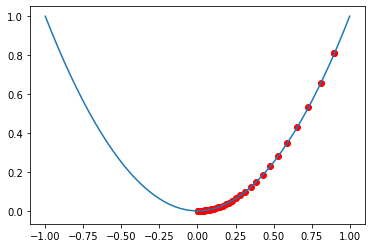

In [49]:
f = lambda x : x**2
grad_f = lambda x: 2*x

plot_func(f)
start_x = 1
visualize_grad_dec(f,grad_f,start_x)
plt.show()

The algorithm converged in 12 steps!
Gradient of last x is 0.007255941119999998


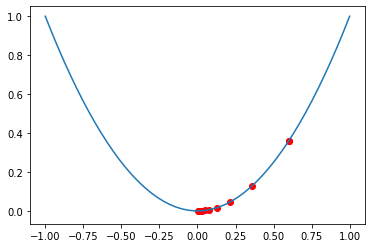

In [50]:
plot_func(f)
start_x = 1
visualize_grad_dec(f,grad_f,start_x, alpha = 0.2)
plt.show()

The algorithm converged in 3798 steps!
Gradient of last x is 0.0009992985651169554


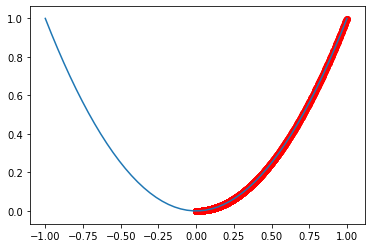

In [51]:
plot_func(f)
start_x = 1
visualize_grad_dec(f,grad_f,start_x, alpha = 0.001, tol = 0.001)
plt.show()

The algorithm converged in 6 steps!
Gradient of last x is 0.15552


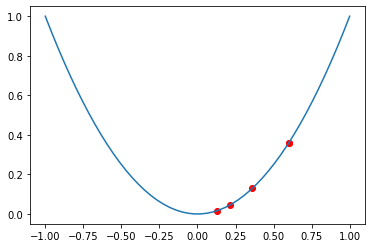

In [55]:
plot_func(f)
start_x = 1
visualize_grad_dec(f,grad_f,start_x, alpha = 0.2, tol = 0.2)
plt.show()

The algorithm converged in 63 steps!
Gradient of last x is 0.0008674724062016637


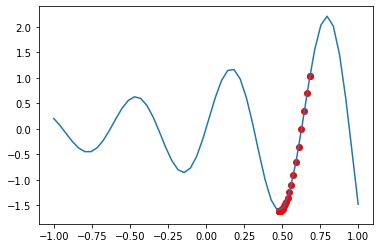

In [57]:
f = lambda x : np.exp(x)*np.sin(10*x)
grad_f = lambda x: np.exp(x)*np.sin(10*x)+10*np.exp(x)*np.cos(10*x)

plot_func(f)
start_x = 0.7
visualize_grad_dec(f,grad_f,start_x, alpha = 0.001, tol = 0.001)
plt.show()

## Animating 1-Dimentional case

<IPython.core.display.Javascript object>


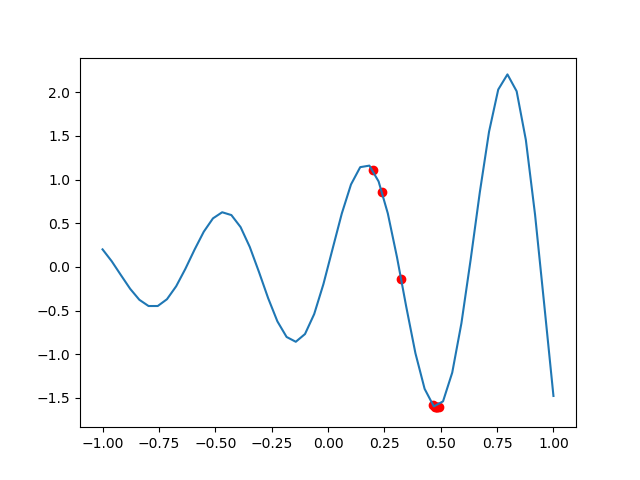

In [3]:
from matplotlib.animation import FuncAnimation
%matplotlib notebook

def plot_point(x,y):
    plt.scatter(x,y, c = 'r')
    
    
def plot_func(f, min_x = -1, max_x = 1):
    x = np.linspace(min_x,max_x)
    plt.plot(x,f(x))
    

    
f = lambda x : np.exp(x)*np.sin(10*x)
grad_f = lambda x: np.exp(x)*np.sin(10*x)+10*np.exp(x)*np.cos(10*x)

plot_func(f)

x1 = 0.2
alpha = 0.01

x2 = x1 - alpha * grad_f(x1)
def animate(i):
    global x1 , alpha
    plot_point(x1,f(x1))
    x2 = x1 - alpha * grad_f(x1)
    x1 = x2 

animate(1)
anim = FuncAnimation(plt.gcf(),animate,interval = 500)

## Animating 2-Dimentional case

In [12]:
from matplotlib.animation import FuncAnimation
from mpl_toolkits import mplot3d
%matplotlib notebook

def plot_3d_point(ax, x, y, z):
    ax.scatter3D(x,y,z, c= 'r', s = 50)

    
    
def plot_3d_func(ax, f, min_range = -2, max_range = 2):
    x = np.linspace(min_range,max_range,100)
    y = np.linspace(min_range,max_range,100)
    X, Y = np.meshgrid(x,y)
    Z = f(np.array([X,Y]))
    ax.plot_surface(X,Y,Z, alpha = 0.8, cmap = 'viridis')

Traceback (most recent call last):
  File "C:\Users\Varuzhan\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\Varuzhan\anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


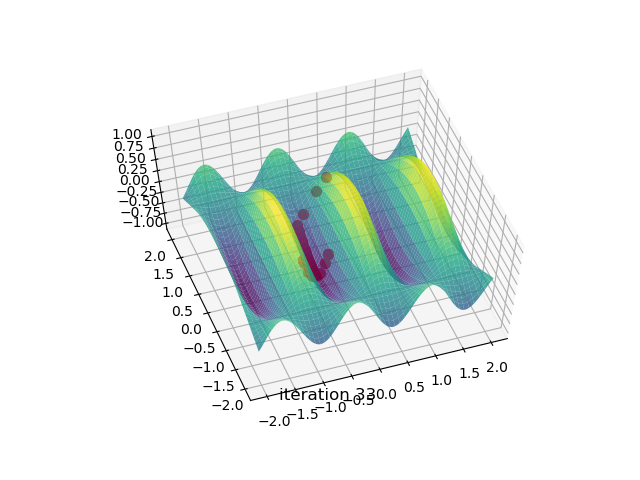

In [13]:
def f(v):
    x = v[0]
    y = v[1]    
    return np.sin(5*x)*np.cos(y)
def grad_f(v):
    x = v[0]
    y = v[1]
    return np.array([5*np.cos(y)*np.cos(5*x), -np.sin(5*x)*np.sin(y)])

fig = plt.figure()
ax = plt.axes(projection = '3d')
plot_3d_func(ax,f)

x1 = np.array([0.2,1])
alpha = 0.1
x2 = x1 - alpha * grad_f(x1)
def animate(i):
    global x1 , alpha
    ax.set_title(f'iteration {i}')
    plot_3d_point(ax, x1[0], x1[1],f(x1))
    x2 = x1 - alpha * grad_f(x1)
    x1 = x2 
animate(1)
anim = FuncAnimation(fig,animate,interval = 500)

<IPython.core.display.Javascript object>


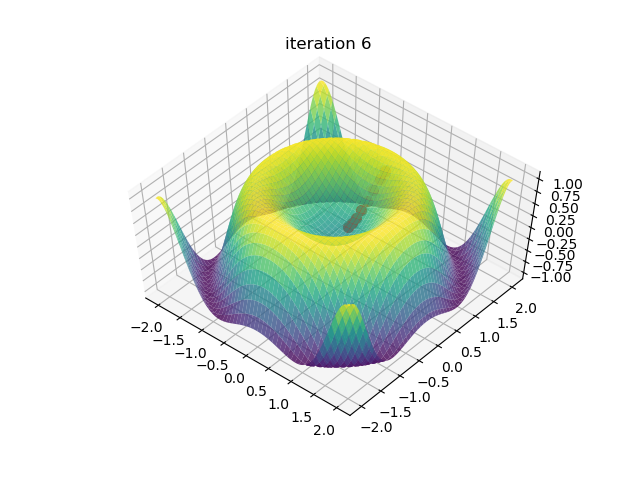

In [14]:
def f(v):
    x = v[0]
    y = v[1]
    return np.sin(x**2+y**2)
def grad_f(v):
    x = v[0]
    y = v[1]
    
    return np.array([np.cos(x**2+y**2)*2*x, np.cos(x**2+y**2)*2*y])

fig = plt.figure()
ax = plt.axes(projection = '3d')
plot_3d_func(ax,f)

x1 = np.array([0.2,1])
alpha = 0.1
x2 = x1 - alpha * grad_f(x1)
def animate(i):
    global x1 , alpha
    ax.set_title(f'iteration {i}')
    plot_3d_point(ax, x1[0], x1[1],f(x1))
    x2 = x1 - alpha * grad_f(x1)
    x1 = x2 

anim = FuncAnimation(fig,animate,interval = 500)